In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
raw_data = pd.read_csv("data/withUnemployment.csv")
raw_data.State = pd.factorize(raw_data.State)[0]
raw_data = raw_data.apply(pd.to_numeric, errors='coerce')
X, y = scale(np.delete(raw_data.values, [0,1], 1)), raw_data.values[:, 1]
print(X[0, :], y[0])
print(X.shape)

[-0.47201265 -0.32461904 -0.78392598  0.24078497] 273.0
(612, 4)


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=None, n_estimators=5000)
scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='explained_variance')
print(np.mean(scores), np.std(scores))

0.9748539045031996 0.010114565663538959


In [39]:
from sklearn.neural_network import MLPRegressor
nnet = MLPRegressor(max_iter=2000, hidden_layer_sizes=(100, 1000, 1000, 100))
scores = cross_val_score(nnet, X_train, y_train, cv=5, scoring='explained_variance')
print(scores)
print(np.mean(scores), np.std(scores))

[0.99093792 0.98191337 0.99412724 0.95670051 0.97024343]
0.9787844953410254 0.01380976344813656


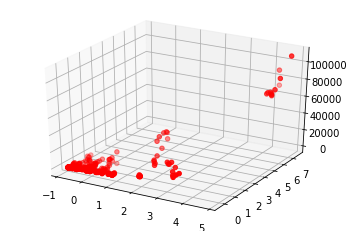

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 2], X_train[:, 1], y_train, c='r', marker='o')
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='explained_variance')
print(scores)
print(np.mean(scores), np.std(scores))

[0.99414768 0.99292371 0.98218816 0.96057057 0.95976337]
0.9779186977410982 0.015081986269487473


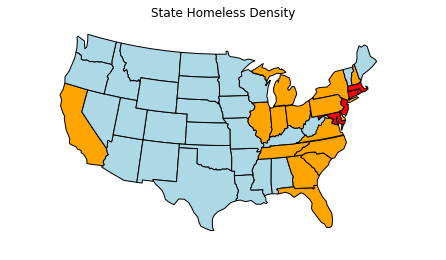

In [13]:
#https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

popdensity = {
    'New Jersey':  438.00,
    'Rhode Island':   387.35,
    'Massachusetts':   312.68,
    'Connecticut':    271.40,
    'Maryland':   209.23,
    'New York':    155.18,
    'Delaware':    154.87,
    'Florida':     114.43,
    'Ohio':  107.05,
    'Pennsylvania':  105.80,
    'Illinois':    86.27,
    'California':  83.85,
    'Virginia':    69.03,
    'Michigan':    67.55,
    'Indiana':    65.46,
    'North Carolina':  63.80,
    'Georgia':     54.59,
    'Tennessee':   53.29,
    'New Hampshire':   53.20,
    'South Carolina':  51.45,
    'Louisiana':   39.61,
    'Kentucky':   39.28,
    'Wisconsin':  38.13,
    'Washington':  34.20,
    'Alabama':     33.84,
    'Missouri':    31.36,
    'Texas':   30.75,
    'West Virginia':   29.00,
    'Vermont':     25.41,
    'Minnesota':  23.86,
    'Mississippi':   23.42,
    'Iowa':  20.22,
    'Arkansas':    19.82,
    'Oklahoma':    19.40,
    'Arizona':     17.43,
    'Colorado':    16.01,
    'Maine':  15.95,
    'Oregon':  13.76,
    'Kansas':  12.69,
    'Utah':  10.50,
    'Nebraska':    8.60,
    'Nevada':  7.03,
    'Idaho':   6.04,
    'New Mexico':  5.79,
    'South Dakota':  3.84,
    'North Dakota':  3.59,
    'Montana':     2.39,
    'Wyoming':      1.96}

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Homeless Density')

for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

#     edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = popdensity[ astate.attributes['name'] ]
    except:
        state_dens = 0

    # simple scheme to assign color to each state
    if state_dens < 40:
        facecolor = "lightblue"
    elif state_dens > 200:
        facecolor = "red"
    else:
        facecolor = "orange"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()